In [3]:
import emcee

In [4]:
npzfile = np.load('outputs/emcee.npz')

In [5]:
npzfile['names']

array(['A_lens', 'r_tensor', 'beta_d', 'epsilon_ds', 'alpha_d_bb',
       'amp_d_bb', 'beta_s', 'alpha_s_bb', 'amp_s_bb'], dtype='<U10')

In [17]:
input_values = [1,0,1.59,0,-0.2,5.0,-3.0,-0.4,2.0]

In [6]:
npzfile['chain'].shape

(32, 1000, 9)

In [7]:
import matplotlib.pyplot as plt

In [8]:
samples = npzfile['chain'].reshape(-1,9)

(-0.003892174747868508, 0.004074086066512327)

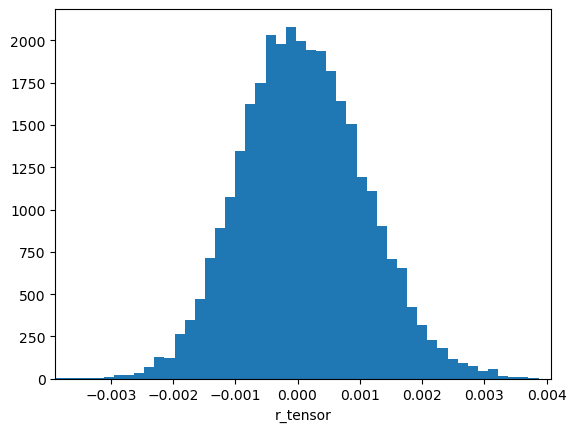

In [9]:
i = 1
plt.hist(samples[:,i], bins=50)
plt.xlabel(npzfile['names'][i])
plt.xlim(np.mean(samples[:,i])-4*np.std(samples[:,i]), np.mean(samples[:,i])+4*np.std(samples[:,i]))

In [10]:
import getdist
from getdist import plots, MCSamples

Removed no burn in


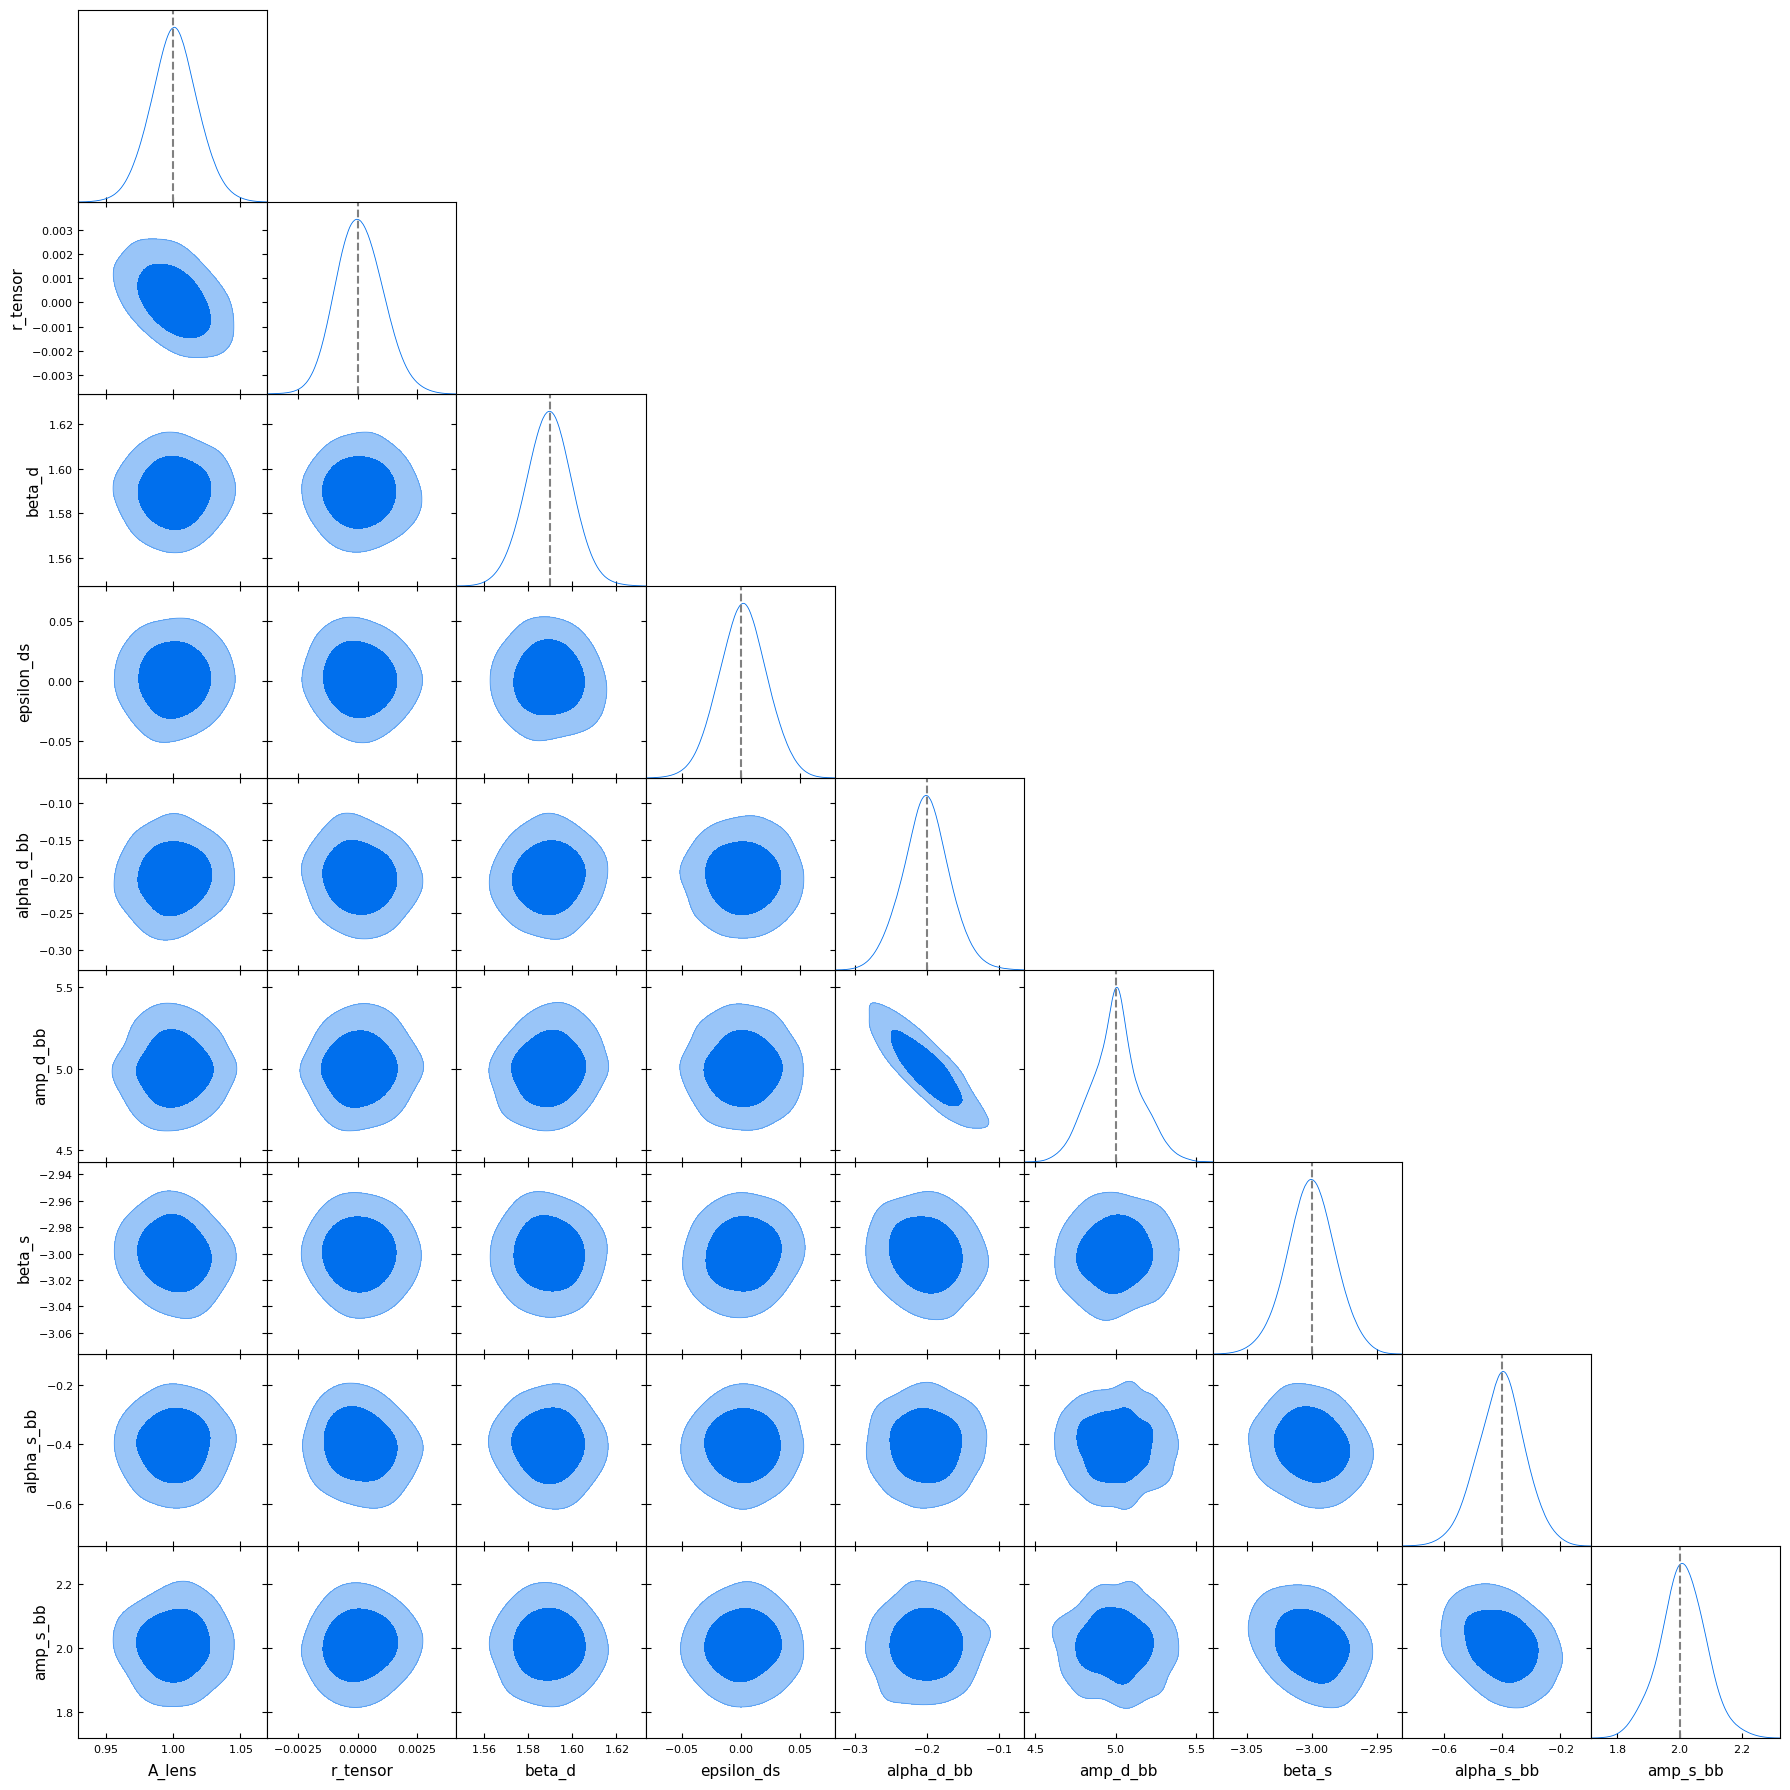

In [19]:
g = plots.get_subplot_plotter()
g.triangle_plot(
    getdist.MCSamples(
        samples=npzfile['chain'].reshape(-1,9),
        names=npzfile['names']),
    filled=True)
for i,name in enumerate(npzfile['names']):
    ax = g.subplots[i,i]
    ax.axvline(input_values[i], color='gray', ls='--')

In [30]:
%run envs.py
import noise_calc
Nell = np.zeros((n_freq,l_max+1))
_, Nell[:,2:], _ = noise_calc.Simons_Observatory_V3_SA_noise(
        sensitivity_mode=2,
        one_over_f_mode=1,
        SAT_yrs_LF=1,
        f_sky=0.1,
        ell_max=l_max+1,
        delta_ell=1
        )

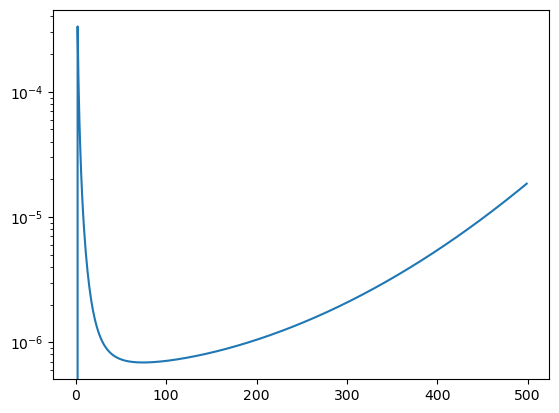

In [46]:
plt.plot(Nell[2,:500])
plt.yscale('log')
plt.show()

In [32]:
Nell[0,:].shape

(1003,)

In [33]:
f.shape

(1001,)